In [23]:
import numpy as np
import cv2
import skimage.io 
import skimage.color
#Import necessary functions
from planarH import computeH_ransac, compositeH, computeH_norm, compositeH
from matchPics import matchPics
from matplotlib import pyplot as plt

In [24]:
#Write script for Q11
cv_cover = cv2.imread('../data/cv_cover.jpg')
cv_desk = cv2.imread('../data/cv_desk.png')
cv_harry = cv2.imread('../data/hp_cover.jpg')

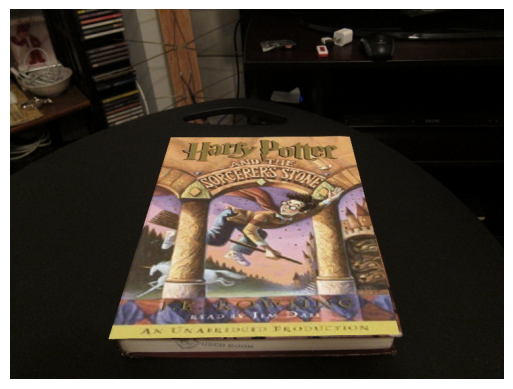

In [38]:
orb = cv2.ORB_create(nfeatures=1000)

kp1, des1 = orb.detectAndCompute(cv_desk, None)
kp2, des2 = orb.detectAndCompute(cv_cover, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.1)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac(pts2_best, pts1_best, 300, 2, adaptive = False)

H2to1_norm = computeH_norm(pts2_best[inliers], pts1_best[inliers])

h, w = cv_desk.shape[:2]

resized_harry = cv2.resize(cv_harry, dsize=(cv_cover.shape[1], cv_cover.shape[0]), interpolation=cv2.INTER_AREA)

result = compositeH(H2to1_norm, resized_harry, cv_desk, direct = False)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result)
plt.axis('off')
plt.show()